In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
%run ../database.ipynb


In [4]:
df = pd.DataFrame(get_all_content())

Average Sentiment Score by Search Keyword:
search_keyword
Sumerian anthropology    0.964334
ancient anthropology     0.802341
ancient china            0.540828
ancient culture          0.571447
china and sumer          0.595824
china sumer              0.461023
chinese and sumerian     0.653166
chinese sumerian         0.567054
old china                0.438716
shang dynasty            0.826774
sumer                    0.682935
sumerian                 0.589556
sumerian chinese         0.485018
sumerian civilization    0.793214
sumerian history         0.931426
xia dynasty              0.782067
Name: siebert_sentiment_score, dtype: float64


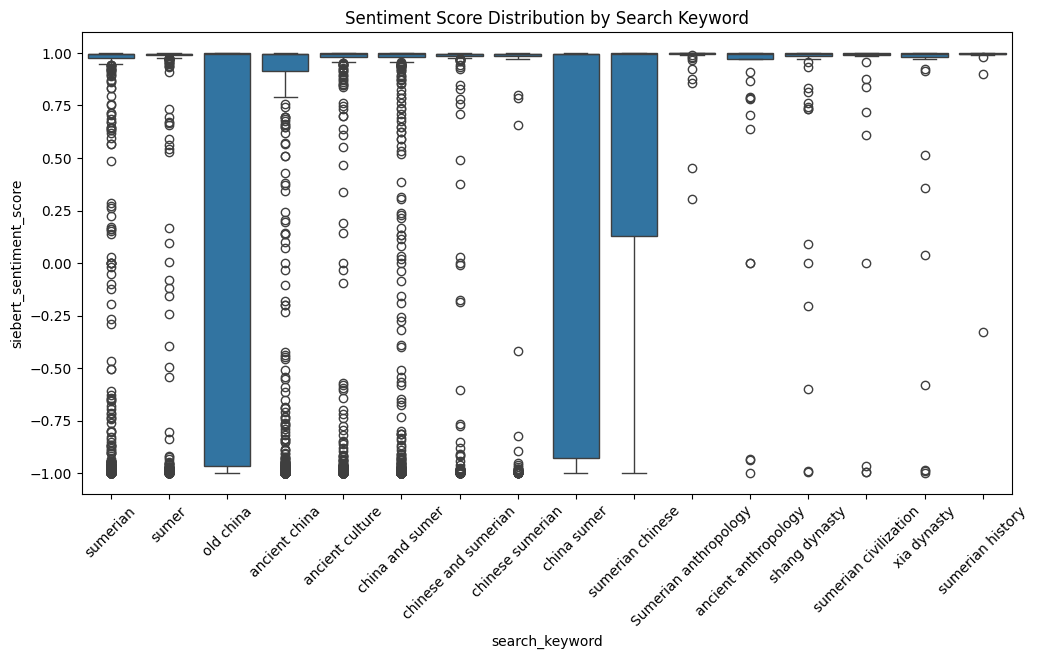

In [ ]:
avg_sentiment_by_keyword = df.groupby('search_keyword')['siebert_sentiment_score'].mean()
print("Average Sentiment Score by Search Keyword:")
print(avg_sentiment_by_keyword)

# Box plot to show distribution 
plt.figure(figsize=(12, 6))
sns.boxplot(x='search_keyword', y='siebert_sentiment_score', data=df)
plt.title("Sentiment Score Distribution by Search Keyword")
plt.xticks(rotation=45)
plt.show()

VADER Sentiment by Search Keyword:
                       compound       pos       neg       neu
search_keyword                                               
Sumerian anthropology  0.847728  0.159700  0.048800  0.791480
ancient anthropology   0.615567  0.135083  0.060833  0.762354
ancient china          0.267825  0.135776  0.088164  0.775582
ancient culture        0.351052  0.145295  0.076286  0.777857
china and sumer        0.330851  0.121618  0.067024  0.811358
china sumer            0.309086  0.126321  0.075315  0.798364
chinese and sumerian   0.448970  0.114632  0.044457  0.839767
chinese sumerian       0.390296  0.088921  0.035074  0.876042
old china              0.409580  0.159084  0.066882  0.774031
shang dynasty          0.617653  0.144133  0.071583  0.750883
sumer                  0.355124  0.091972  0.034491  0.873537
sumerian               0.289636  0.083360  0.041124  0.873475
sumerian chinese       0.382654  0.130347  0.075069  0.794583
sumerian civilization  0.795356  0.

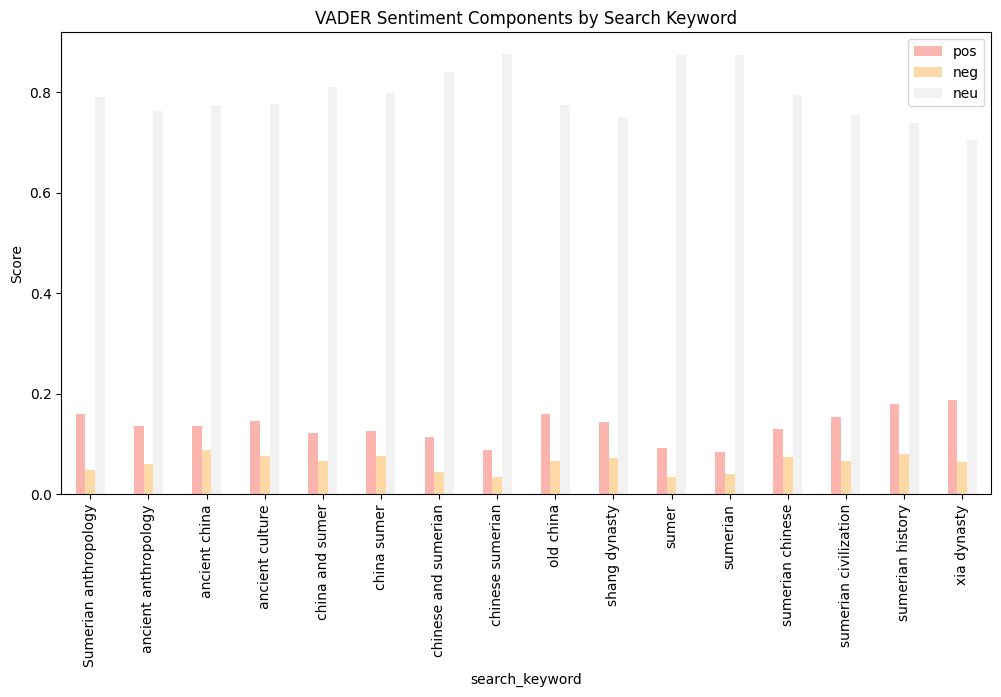

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply VADER to preprocessed_text
data['vader_scores'] = data['preprocessed_text'].apply(lambda x: analyzer.polarity_scores(x))
data['compound'] = data['vader_scores'].apply(lambda x: x['compound'])  # -1 to 1
data['pos'] = data['vader_scores'].apply(lambda x: x['pos'])
data['neg'] = data['vader_scores'].apply(lambda x: x['neg'])
data['neu'] = data['vader_scores'].apply(lambda x: x['neu'])

# Group by search_keyword
vader_by_keyword = data.groupby('search_keyword')[['compound', 'pos', 'neg', 'neu']].mean()
print("VADER Sentiment by Search Keyword:")
print(vader_by_keyword)

# Visualization
vader_by_keyword[['pos', 'neg', 'neu']].plot(kind='bar', figsize=(12, 6), colormap='Pastel1')
plt.title("VADER Sentiment Components by Search Keyword")   
plt.ylabel("Score")
plt.show()